In [3]:
import cv2
import numpy as np
import  matplotlib.pyplot as plt
 
#读取照片
img = r"C:\Users\Administrator\Desktop\bj.jpg"
 
#图像的二值化 
src = cv2.imread(img,cv2.IMREAD_UNCHANGED)

#卷积核5*5
kernel = np.ones((5,5),np.uint8)
 
    
#图像的腐蚀，默认迭代次数
erosion = cv2.erode(src,kernel)

#显示照片
cv2.imshow('origin',src)

# 腐蚀后
cv2.imshow('after erosion',erosion)
plt.show()
cv2.waitKey(0)

-1

In [4]:
import cv2
import numpy as np
import  matplotlib.pyplot as plt
 
img = r"C:\Users\Administrator\Desktop\bj.jpg"

# 图像的二值化
src = cv2.imread(img, cv2.IMREAD_UNCHANGED)
 
# 设置卷积核5*5
kernel = np.ones((5, 5), np.uint8)
 
# 图像的腐蚀，默认迭代次数
erosion = cv2.erode(src, kernel)

# 图像的膨胀
dst = cv2.dilate(erosion, kernel)
 
# 效果展示
cv2.imshow('origin', src)
# 腐蚀后
cv2.imshow('after erosion', erosion)
# 膨胀后
cv2.imshow('after dilate', dst)
 
    
plt.show()
cv2.waitKey(0)

-1

In [33]:
def edgeSegmentation(filename):
    # 读取图片
    img = cv2.imread(filename)
    
    # 灰度化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 高斯模糊处理:去噪(效果最好)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    
    # Sobel计算XY方向梯度
    gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0)
    gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1)
    
    # 计算梯度差
    gradient = cv2.subtract(gradX, gradY)
    # 绝对值
    gradient = cv2.convertScaleAbs(gradient)
    # 高斯模糊处理:去噪(效果最好)
    blured = cv2.GaussianBlur(gradient, (9, 9), 0)
    
    # 二值化
    _, dst = cv2.threshold(blured, 90, 255, cv2.THRESH_BINARY)
    # 滑动窗口
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (107, 76))
    # 生成一个核
    
    # 形态学处理:形态闭处理(腐蚀)
    closed = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)
    
    
    # 腐蚀与膨胀迭代
    closed = cv2.erode(closed, None, iterations=4)
    closed = cv2.dilate(closed, None, iterations=4)
    
  
    # 获取轮廓
    cnts, hierarchy = cv2.findContours( closed.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    draw_img = cv2.drawContours(img.copy(), [box], -1, (0, 0, 255), 3)
    #cv2.imshow("Box", draw_img)
    #cv2.imwrite('./test/monkey.png', draw_img)
    images = [blured, dst, closed, draw_img]
    imgaesTitle = ['blured', 'dst', 'closed', 'draw_img']
    plt.figure(figsize=(16,10))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], 'gray')
        plt.title(imgaesTitle[i])
        #cv2.imwrite(imgaesTitle[i]+'.jpg', images[i])
    plt.show()
    cv2.waitKey(0)

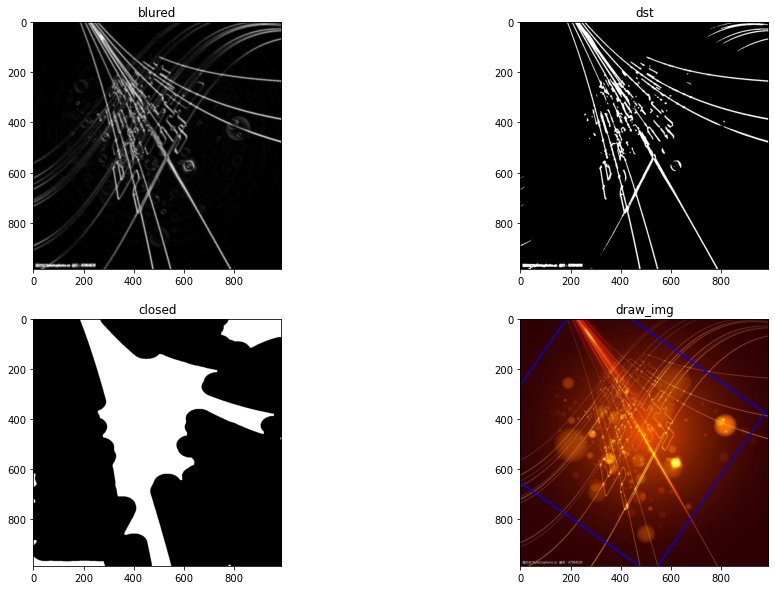

In [34]:
img = r"C:\Users\Administrator\Desktop\bj.jpg"
edgeSegmentation(img)

In [ ]:
edgeSegmentation(img)

In [27]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (107, 76))           #生成进行膨胀，腐蚀的卷积核    长*高

In [30]:
kernel.shape

(76, 107)

In [35]:
sum(kernel)

array([11, 17, 23, 27, 31, 33, 37, 39, 41, 43, 45, 47, 49, 51, 53, 53, 55,
       57, 57, 59, 61, 61, 63, 63, 65, 65, 65, 67, 67, 69, 69, 69, 71, 71,
       71, 71, 73, 73, 73, 73, 73, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
       75, 75, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 73, 73,
       73, 73, 73, 71, 71, 71, 71, 69, 69, 69, 67, 67, 65, 65, 65, 63, 63,
       61, 61, 59, 57, 57, 55, 53, 53, 51, 49, 47, 45, 43, 41, 39, 37, 33,
       31, 27, 23, 17, 11], dtype=uint8)

In [36]:
kernel.shape

(76, 107)

In [37]:
dst.shape 

(987, 991, 3)

In [38]:
disi=[11, 17, 23, 27, 31, 33, 37, 39, 41, 43, 45, 47, 49, 51, 53, 53, 55,
57, 57, 59, 61, 61, 63, 63, 65, 65, 65, 67, 67, 69, 69, 69, 71, 71,
71, 71, 73, 73, 73, 73, 73, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
75, 75, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 73, 73,
73, 73, 73, 71, 71, 71, 71, 69, 69, 69, 67, 67, 65, 65, 65, 63, 63,
61, 61, 59, 57, 57, 55, 53, 53, 51, 49, 47, 45, 43, 41, 39, 37, 33,
31, 27, 23, 17, 11]

## sorted(list(set(disi)),reverse=True)    

In [45]:
len(dst) 

987

In [47]:
dst[20:50]

array([[[48,  0,  6],
        [48,  0,  6],
        [48,  0,  6],
        ...,
        [57,  5,  0],
        [57,  5,  0],
        [57,  5,  0]],

       [[48,  0,  6],
        [48,  0,  6],
        [48,  0,  6],
        ...,
        [50,  1,  0],
        [50,  1,  0],
        [49,  0,  0]],

       [[48,  0,  6],
        [48,  0,  6],
        [48,  0,  6],
        ...,
        [49,  0,  2],
        [49,  0,  2],
        [49,  0,  2]],

       ...,

       [[48,  0,  6],
        [48,  0,  6],
        [48,  0,  6],
        ...,
        [46,  1,  3],
        [46,  1,  3],
        [46,  1,  3]],

       [[48,  0,  6],
        [48,  0,  6],
        [48,  0,  6],
        ...,
        [48,  1,  3],
        [48,  1,  3],
        [48,  1,  3]],

       [[48,  0,  6],
        [48,  0,  6],
        [48,  0,  6],
        ...,
        [48,  1,  3],
        [48,  1,  3],
        [48,  1,  3]]], dtype=uint8)

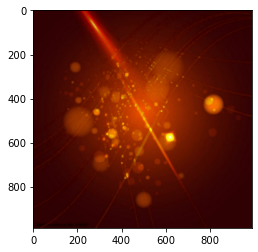

In [48]:
plt.imshow(dst)
plt.show()

In [55]:
filename = r"C:\Users\Administrator\Desktop\bj.jpg"

# 读取图片
img = cv2.imread(filename)

# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 高斯模糊处理:去噪(效果最好)
blur = cv2.GaussianBlur(gray, (9, 9), 0)

# Sobel计算XY方向梯度
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1)

# 计算梯度差
gradient = cv2.subtract(gradX, gradY)
# 绝对值
gradient = cv2.convertScaleAbs(gradient)
# 高斯模糊处理:去噪(效果最好)
blured = cv2.GaussianBlur(gradient, (9, 9), 0)

# plt.imshow(blured)
# plt.show()

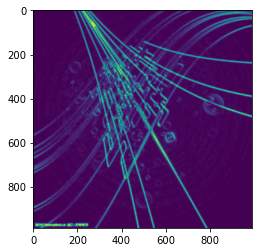

In [56]:
plt.imshow(blured)
plt.show()